In [2]:
import pandas as pd
import time
import numpy as np
from numpy import array
import re
%matplotlib inline
from shapely.geometry import Polygon
np.nan
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage.pdf')
import pylab as plot
import datetime







In [9]:
df = pd.read_excel('../datasets/export-2.xls')

In [10]:
df.shape

(11371, 49)

In [8]:
df.head(1)

,Identification number:,Registration date:,Section,Subsection,(Organisation) name,Legal status:,Website address:,Head office country,Head office address,Head office city,...,Financial year: End Date,Estimate of costs (absolute amount),Estimate of costs (as a range),Turnover (absolute amount),Turnover (as a range),Customers,Procurement:,Source,Grants:,Source.1
0,773837227033-59,03/05/2017,"VI - Organisations representing local, regiona...",Regional structures,Serviço Intermunicipalizado de Gestão de Resíd...,Association,http://www.lipor.pt,Portugal,"Rua da Morena, 805",Gondomar,...,01/12/2016,NaN,1750000-1999999,53148.0,NaN,NaN,NaN,NaN,45748.0,H2020/Waste ub-2016/Comissão Europeia(641660);...


In [9]:
df.sort_values(by='Registration date:').tail()

,Identification number:,Registration date:,Section,Subsection,(Organisation) name,Legal status:,Website address:,Head office country,Head office address,Head office city,...,Financial year: End Date,Estimate of costs (absolute amount),Estimate of costs (as a range),Turnover (absolute amount),Turnover (as a range),Customers,Procurement:,Source,Grants:,Source.1
3963,463723920133-91,31/12/2015,"IV - Think tanks, research and academic instit...",Academic institutions,Universitatea Ovidius din Constanta (UOC),public university,http://www.univ-ovidius.ro,Romania,Bd. Mamaia 124,Constanta,...,01/12/2014,NaN,10000-24999,22000000.0,NaN,NaN,NaN,NaN,NaN,NaN
6916,869115625293-10,31/12/2016,III - Non-governmental organisations,"Non-governmental organisations, platforms and ...",All Together in Dignity - ATD Fourth World Ire...,Company limited by Guarantee with Charitable N...,http://www.atdireland.ie,Ireland,26 Mountjoy Square,Dublin 1,...,01/12/2015,2000.0,NaN,49317.0,NaN,NaN,NaN,NaN,10500.0,European Year fo Development fund
6789,589052325294-59,31/12/2016,II - In-house lobbyists and trade/business/pro...,Trade and business associations,The UK Oil and Gas Industry Association Limite...,Association,http://www.oilandgasuk.co.uk,United Kingdom,6th Floor East Portland House Bressenden Place,London,...,01/12/2016,NaN,0-9999,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6847,450975425295-82,31/12/2016,"VI - Organisations representing local, regiona...","Other public or mixed entities, created by law...",Samenwerkingsorganisatie Beroepsonderwijs Bedr...,stichting,http://www.s-bb.nl,Netherlands,Louis Braillelaan 24,Zoetermeer,...,01/12/2015,NaN,0-9999,50000.0,NaN,NaN,NaN,NaN,NaN,NaN
6790,900241225299-67,31/12/2016,III - Non-governmental organisations,"Non-governmental organisations, platforms and ...",European Unemployed (EU),at the moment: none,http://www.europeanunemployed.eu,Austria,Krottenbachstrasse 40/9/6,Wien,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


# To do 

1) create seperate dataframes based on which year/date they were created

2) select which columns you will measure

3) start plotting them, see where it goes

In [11]:
df['date'] = pd.to_datetime(df['Registration date:'], format="%d/%m/%Y")

In [12]:
df.set_index('date', inplace=True)

In [12]:
df2013_2014 = df['2013-06-24':'2014-06-24']

In [13]:
df2014_2015 = df['2014-06-24':'2015-06-24']

In [14]:
df2015_2016 = df['2015-06-24':'2016-06-24']

In [15]:
df2016_2017 = df['2016-06-24':'2017-06-24']

In [13]:
df.dtypes

Identification number:                                            object
Registration date:                                                object
Section                                                           object
Subsection                                                        object
(Organisation) name                                               object
Legal status:                                                     object
Website address:                                                  object
Head office country                                               object
Head office address                                               object
Head office city                                                  object
Head office post code                                             object
Head office post box                                              object
Head office phone                                                 object
Belgium office address                             

1) Total number DONE

2) Section

3) Head office country

4) Level of interest

5) Fields of interest

Total number plot

In [17]:
#index = ['2014', '2015', '2016', '2017']
columns = ['New Lobbyists', 'year']
df_years = pd.DataFrame(columns=columns)


In [18]:
'776', '1767', '2086', '3272'

('776', '1767', '2086', '3272')

In [19]:
df_years['New Lobbyists'] = 774, 776, 1767, 2086, 3272

In [20]:
df_years['year'] = '2013', '2014', '2015', '2016', '2017'

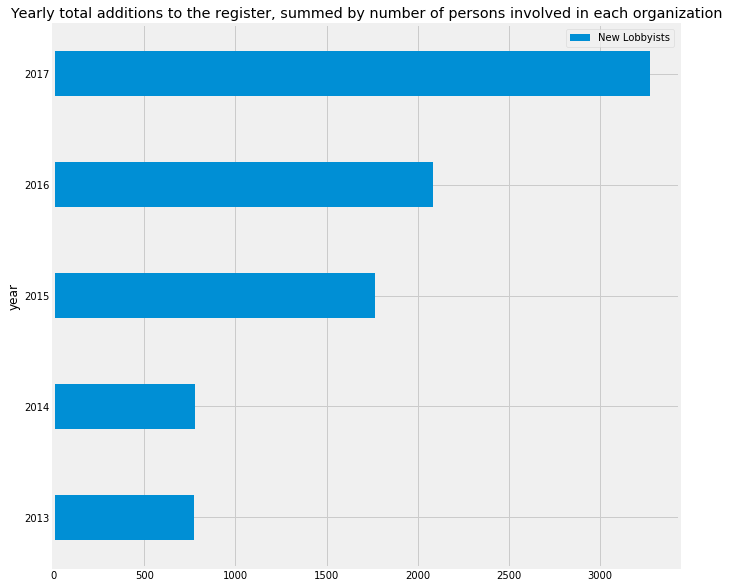

In [511]:
ax = df_years.plot(kind='barh', x='year', y='New Lobbyists', figsize=(10,10), width=0.4)
plt.title('Yearly total additions to the register, summed by number of persons involved in each organization')
plt.savefig("bar_uk.pdf")



Head office country plot

In [22]:
df_office = df[['Head office country']].copy()

In [23]:
df.head()

,Identification number:,Registration date:,Section,Subsection,(Organisation) name,Legal status:,Website address:,Head office country,Head office address,Head office city,...,Financial year: End Date,Estimate of costs (absolute amount),Estimate of costs (as a range),Turnover (absolute amount),Turnover (as a range),Customers,Procurement:,Source,Grants:,Source.1
date,,,,,,,,,,,,,,,,,,,,,
2017-05-03,773837227033-59,03/05/2017,"VI - Organisations representing local, regiona...",Regional structures,Serviço Intermunicipalizado de Gestão de Resíd...,Association,http://www.lipor.pt,Portugal,"Rua da Morena, 805",Gondomar,...,01/12/2016,NaN,1750000-1999999,53148.0,NaN,NaN,NaN,NaN,45748.0,H2020/Waste ub-2016/Comissão Europeia(641660);...
2017-05-17,619080527193-67,17/05/2017,II - In-house lobbyists and trade/business/pro...,Companies & groups,JURISTAX,SPRL,http://www.juristax.eu,Belgium,Chaussée de Viesville 148,Gosselies,...,01/12/2016,NaN,0-9999,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-26,260636426921-26,26/04/2017,III - Non-governmental organisations,"Non-governmental organisations, platforms and ...",Center for Energy Efficiency and Renewables (P...,Association,http://proenergy.md,"Moldova, Republic Of","Str. Ismail 18, ap. 1 str. Lomonosov 51/1, ap. 26",Chisinau,...,01/03/2017,NaN,10000-24999,12000.0,NaN,NaN,NaN,NaN,10000.0,"SUDeP, European Commission/European Delegation..."
2017-04-21,625772526856-05,21/04/2017,II - In-house lobbyists and trade/business/pro...,Trade unions and professional associations,"Federación Provincial de Agricultores, ganader...",Organización Profesional Agraria,http://www.asajacastelln.com,Spain,"C/ Juan Antonio balbés nº entlo, 1",Castellón,...,01/12/2016,NaN,100000-199999,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-10,377496227124-29,10/05/2017,I - Professional consultancies/law firms/self-...,Professional consultancies,NW (NW),Private,https://www.linkedin.com/in/nicolaswallet/,United Kingdom,10 Lyron,Rendall,...,01/04/2017,NaN,0-9999,9900.0,NaN,European Marine Energy Centre Ltd,NaN,NaN,NaN,NaN


In [24]:
df_office['Head office country'].value_counts().sort_values(ascending=False).head(20)

Belgium           1108
Germany            878
United Kingdom     817
France             711
Italy              645
Spain              548
Netherlands        446
United States      272
Sweden             202
Poland             189
Switzerland        164
Finland            161
Portugal           159
Austria            151
Denmark            137
Ireland            131
Greece             112
Czech Republic      91
Romania             91
Hungary             80
Name: Head office country, dtype: int64

In [25]:
df.groupby('Head office country')['Section'].value_counts().sort_values(ascending=False)

Head office country                     Section                                                                                                        
Germany                                 II - In-house lobbyists and trade/business/professional associations                                               460
Belgium                                 II - In-house lobbyists and trade/business/professional associations                                               396
United Kingdom                          II - In-house lobbyists and trade/business/professional associations                                               394
France                                  II - In-house lobbyists and trade/business/professional associations                                               384
Belgium                                 III - Non-governmental organisations                                                                               375
Italy                                   II - In-house

In [26]:
df['Level of interest'].value_counts()


European                                      1511
national                                      1486
global                                        1433
European, global, national, regional/local     709
European, national                             703
European, national, regional/local             643
European, global, national                     355
regional/local                                 347
European, global                               293
national, regional/local                       206
European, regional/local                       100
global, national                                40
global, national, regional/local                28
European, global, regional/local                17
global, regional/local                          13
Name: Level of interest, dtype: int64

In [27]:
df['Fields of interest'].value_counts()

General and Institutional Affairs, Economic and Financial Affairs, Agriculture and Rural Development, Humanitarian Aid, Audiovisual and Media, Budget, Trade, Competition, Consumer Affairs, Culture, Development, Customs, Education, Enlargement, Employment and Social Affairs, Energy, Enterprise, Environment, Taxation, Youth, Justice and Fundamental Rights, Internal Market, Fisheries and Aquaculture, Foreign and Security Policy and Defence, Regional Policy, Research and Technology, External Relations, Trans-European Networks, Public Health, Food Safety, Information Society, Sport, Transport, Climate Action, Home Affairs, Communication, Financial Stability, Financial Services and Capital Markets Union    227
Public Health                                                                                                                                                                                                                                                                                 

Graph the rate of natioanl incrase

In [156]:
# tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
#              (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
#              (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
#              (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
#              (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
# for i in range(len(tableau20)):    
#     r, g, b = tableau20[i]    
#     tableau20[i] = (r / 255., g / 255., b / 255.)    
# plt.figure(figsize=(12, 14))    
# ax = plt.subplot(111)    
# ax.spines["top"].set_visible(False)    
# ax.spines["bottom"].set_visible(False)    
# ax.spines["right"].set_visible(False)    
# ax.spines["left"].set_visible(False)    
# ax.get_xaxis().tick_bottom()    
# ax.get_yaxis().tick_left()    
# plt.ylim(60, 1300)    
# plt.xlim(2013, 2017)
# plt.yticks(range(60, 1300, 150), [str(x) for x in range(60, 1300, 150)], fontsize=14)    
# plt.xticks(fontsize=14)
# for y in range(60, 1300, 150):    
#     plt.plot(range(2013, 2017), [y] * len(range(2013, 2017)), "--", lw=0.5, color="black", alpha=0.3)
# plt.tick_params(axis="both", which="both", bottom="off", top="off",    
#                 labelbottom="on", left="off", right="off", labelleft="on")    
# majors = ['Belgium',
# 'Germany',
# 'United Kingdom',
# 'France',
# 'Italy',
# 'Spain', 
# 'Netherlands', 
# 'United States', 
# 'Sweden', 
# 'Poland', 
# 'Switzerland',
# 'Finland', 
# 'Portugal', 
# 'Austria', 
# 'Denmark', 
# 'Ireland', 
# 'Greece', 
# 'Romania', 
# 'Czech Republic', 
# 'Hungary']   

# for rank, column in enumerate(majors):    
#     plt.plot(df['Head office country'].value_counts().sort_values(ascending=False).head(20).values, 
#              lw=2.5, color=tableau20[rank])    




Thoughts:


So what we have to do is to use .resample('M') to group the general df by month, from the beginning to the end. Afterwards we need to create line charts of the selected variables where we measure the increase in numeric increase (as more lobbyists arrive every year) 

Maybe we could do barcharts next to each other to measure their change every year? Too crowded?
Maybe we can do linecharts to 

In [148]:
# df.head(1)


In [84]:
# plt.style.use('seaborn-*')

In [149]:
# df.resample('6M')['Head office country'].value_counts().plot(figsize=(24,24))

In [150]:
# df_UK = df[df['Head office country'].str.contains('United Kingdom')]

In [151]:
# df_UK.resample('6m').plot(figsize=(12,12), y='Number of persons involved:')

In [152]:
# df_DE = df[df['Head office country'].str.contains('Germany')]
# df_DE.resample('A').plot(figsize=(12,12), y='Number of persons involved:')

In [153]:
# df_FR = df[df['Head office country'].str.contains('France')]
# df_FR.resample('A').plot(figsize=(12,12), y='Number of persons involved:')

In [154]:
# df_BE = df[df['Head office country'].str.contains('Belgium')]
# df_BE.resample('A').plot(figsize=(12,12), y='Number of persons involved:')

In [155]:
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)


In [14]:
df_countries = df[df['Head office country'].str.contains('Germany|United Kingdom|France|Belgium|Ireland|Netherlands' )]

In [15]:
df_countries.reset_index(inplace=True)

In [16]:
# df_countries.set_index('')

In [17]:
df_countries.set_index(['Identification number:', 'Registration date:'], append=True)


,,,date,Section,Subsection,(Organisation) name,Legal status:,Website address:,Head office country,Head office address,Head office city,Head office post code,...,Financial year: End Date,Estimate of costs (absolute amount),Estimate of costs (as a range),Turnover (absolute amount),Turnover (as a range),Customers,Procurement:,Source,Grants:,Source.1
,Identification number:,Registration date:,,,,,,,,,,,,,,,,,,,,,
0,505622327972-14,09/08/2017,2017-08-09,I - Professional consultancies/law firms/self-...,Professional consultancies,BRITISH BOARD FOR TRAINING AND CONSULTING (BBTC),Private limited Company,http://british-board.uk,United Kingdom,"40 Bloomsbury Way, Lower Ground Floor, London,...",London,WC1A 2SE,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,567643027955-53,07/08/2017,2017-08-07,III - Non-governmental organisations,"Non-governmental organisations, platforms and ...",Cruelty Free International,Company incorporated as private limited by gua...,http://www.crueltyfreeinternational.org,United Kingdom,16A Crane Grove,London,N7 8NN,...,01/03/2016,NaN,10000-24999,2268844.0,NaN,NaN,NaN,NaN,NaN,NaN
2,783802227761-08,02/08/2017,2017-08-02,"IV - Think tanks, research and academic instit...",Think tanks and research institutions,2° Investing Initiative (2° II),non-profit association,http://2degrees-investing.org/,France,97 rue la Fayette,Paris,75010,...,01/12/2016,NaN,10000-24999,2701000.0,NaN,NaN,NaN,NaN,1928000.0,"H2020, LIFE Operating Grant"
3,733782427856-16,26/07/2017,2017-07-26,II - In-house lobbyists and trade/business/pro...,Companies & groups,GLOBAL BIOENERGIES,SA,http://www.global-bioenergies.com/?lang=fr,France,5 RUE HENRI DESBRUERES,EVRY,91000,...,01/12/2016,NaN,25000-49999,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,883659127919-29,01/08/2017,2017-08-01,II - In-house lobbyists and trade/business/pro...,Companies & groups,SD-M GmbH,GmbH,http://www.sd-m.de,Germany,Podbielskistr. 166 B,Hannover,30177,...,01/12/2016,NaN,10000-24999,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,746668127949-16,06/08/2017,2017-08-06,I - Professional consultancies/law firms/self-...,Self-employed consultants,EXPAND,personne physique,NaN,Belgium,TONY ROSS 11,EMBOURG,4053,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,459264327872-70,27/07/2017,2017-07-27,II - In-house lobbyists and trade/business/pro...,Trade and business associations,Irish Grain & Feed Association (IGFA),CLG,http://www.igfa.ie,Ireland,Lower Main Street Abbeyleix Co Laois,Abbeyleix,R32 XHH0,...,01/05/2017,NaN,10000-24999,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,294492727880-53,28/07/2017,2017-07-28,II - In-house lobbyists and trade/business/pro...,Trade and business associations,European Federation of the Parquet Industry (FEP),non profit organisation,http://www.parquet.net,Belgium,Rue Montoyer 24/box 20,Brussels,1000,...,01/12/2016,NaN,200000-299999,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,001401227952-43,07/08/2017,2017-08-07,I - Professional consultancies/law firms/self-...,Self-employed consultants,Ganymede Consultancy (Ganymede),nono,NaN,Netherlands,Raadhuisplein 3 B,Zandvoort aan Zee,2042LR,...,01/12/2016,NaN,0-9999,NaN,0-99999,NaN,NaN,NaN,NaN,NaN


In [44]:
df_countries.head()

,date,Identification number:,Registration date:,Section,Subsection,(Organisation) name,Legal status:,Website address:,Head office country,Head office address,...,Financial year: End Date,Estimate of costs (absolute amount),Estimate of costs (as a range),Turnover (absolute amount),Turnover (as a range),Customers,Procurement:,Source,Grants:,Source.1
0,2017-05-17,619080527193-67,17/05/2017,II - In-house lobbyists and trade/business/pro...,Companies & groups,JURISTAX,SPRL,http://www.juristax.eu,Belgium,Chaussée de Viesville 148,...,01/12/2016,NaN,0-9999,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-05-10,377496227124-29,10/05/2017,I - Professional consultancies/law firms/self-...,Professional consultancies,NW (NW),Private,https://www.linkedin.com/in/nicolaswallet/,United Kingdom,10 Lyron,...,01/04/2017,NaN,0-9999,9900.0,NaN,European Marine Energy Centre Ltd,NaN,NaN,NaN,NaN
2,2017-05-15,955829227170-48,15/05/2017,II - In-house lobbyists and trade/business/pro...,Trade and business associations,European Wireless Infrastructure Association (...,AISBL,http://ewia.org,Belgium,Avenue des Arts 46 Brussels,...,01/08/2016,NaN,25000-49999,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-05-03,572620127016-81,03/05/2017,"VI - Organisations representing local, regiona...",Regional structures,Flanders Investment & Trade (FIT),EVA,http://www.flandersinvestmentandtrade.be,Belgium,Koning Albert II-laan 37,...,01/12/2016,150000.0,NaN,54000000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-25,844053226897-51,25/04/2017,I - Professional consultancies/law firms/self-...,Self-employed consultants,GLP CONSEILS,EIRL,https://glpconseils.wordpress.com/,France,10 IMPASSE SAINT JACQUES,...,01/12/2016,NaN,0-9999,NaN,0-99999,société pour la valorisation des écoactions de...,NaN,NaN,NaN,NaN


In [157]:
# df.dtypes

In [18]:

df_countries = df_countries.pivot_table(index=('Registration date:'), columns='Head office country', values='Number of persons involved:')

In [19]:
df_countries.index = pd.to_datetime(df_countries.index, format="%d/%m/%Y")

In [47]:
df_countries.resample('A')

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [97]:
plt.style.use('fivethirtyeight')

In [158]:
# df_countries.head()

In [20]:
df_countries.resample('A').head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


Head office country,Belgium,France,Germany,Ireland,Netherlands,Netherlands Antilles,United Kingdom
Registration date:,,,,,,,
2008-12-31,7.240385,4.452381,7.310897,4.000000,4.833333,NaN,7.375000
2009-12-31,7.162434,4.768362,4.888356,6.600000,5.029762,NaN,5.385417
2010-12-31,4.902141,3.178571,4.528736,1.333333,5.523810,NaN,7.037500
2011-12-31,5.264331,4.701389,6.205490,3.833333,3.635135,NaN,5.256338
2012-12-31,4.344048,3.648649,3.482222,5.600000,4.069767,1.0,5.535211


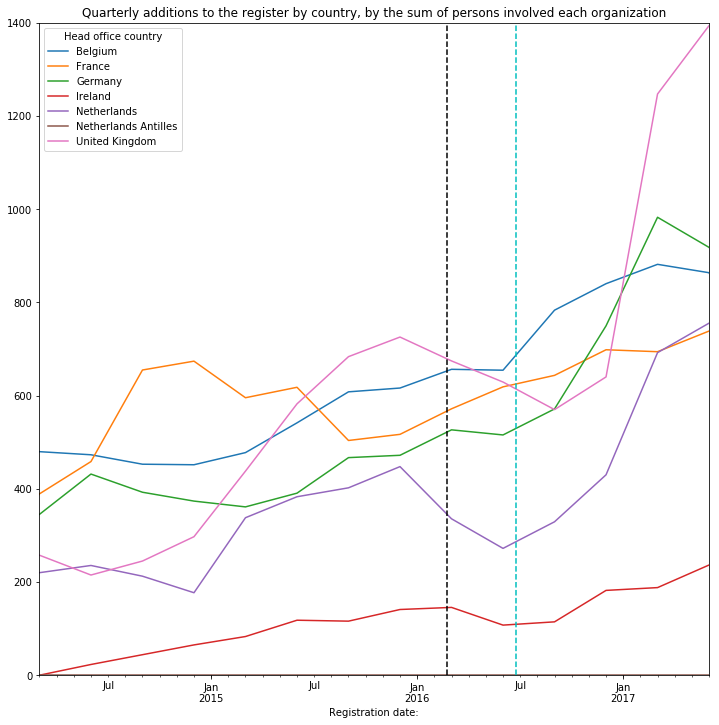

In [26]:
# import matplotlib.pyplot as plt
# fig,ax = plt.subplots()

# pd.rolling(df_countries.resample('m'), window = 6, min_periods=1).sum().plot(figsize=(12,12))
# VIVA ROLLING

ax = df_countries.resample("3m").sum().fillna(0).rolling(window=4).sum().plot(figsize=(12,12))
plt.xlim( ('2014-3-1', '2017-6-30') )
plt.title('Quarterly additions to the register by country, by the sum of persons involved each organization')

ax.set_ylim([0,1400])
line1, = plt.plot([557.76, 557.76], [0, 1400], 'c--', label="Brexit", linestyle='--')
line2, = plt.plot([553.76, 553.76], [0, 1400], 'k--', label="Brexit", linestyle='--')


# first_legend = plt.legend(handles=[line1], loc=1)

plt.savefig('head_office_rest.pdf')



In [202]:
# import matplotlib.pyplot as plt
# fig,ax = plt.subplots()

# df_countries.resample('6m').sum().plot(figsize=(12,12), ax=ax)



In [49]:
df.head(1)

,Identification number:,Registration date:,Section,Subsection,(Organisation) name,Legal status:,Website address:,Head office country,Head office address,Head office city,...,Financial year: End Date,Estimate of costs (absolute amount),Estimate of costs (as a range),Turnover (absolute amount),Turnover (as a range),Customers,Procurement:,Source,Grants:,Source.1
date,,,,,,,,,,,,,,,,,,,,,
2017-05-03,773837227033-59,03/05/2017,"VI - Organisations representing local, regiona...",Regional structures,Serviço Intermunicipalizado de Gestão de Resíd...,Association,http://www.lipor.pt,Portugal,"Rua da Morena, 805",Gondomar,...,01/12/2016,NaN,1750000-1999999,53148.0,NaN,NaN,NaN,NaN,45748.0,H2020/Waste ub-2016/Comissão Europeia(641660);...


In [50]:
df_types_UK = df[df['Head office country'].str.contains('United Kingdom' )]

In [51]:
df_types_UK = df_types_UK.pivot_table(index=('Registration date:'), columns='Section', values='Number of persons involved:')

In [52]:
df_types_UK.index = pd.to_datetime(df_types_UK.index, format="%d/%m/%Y")

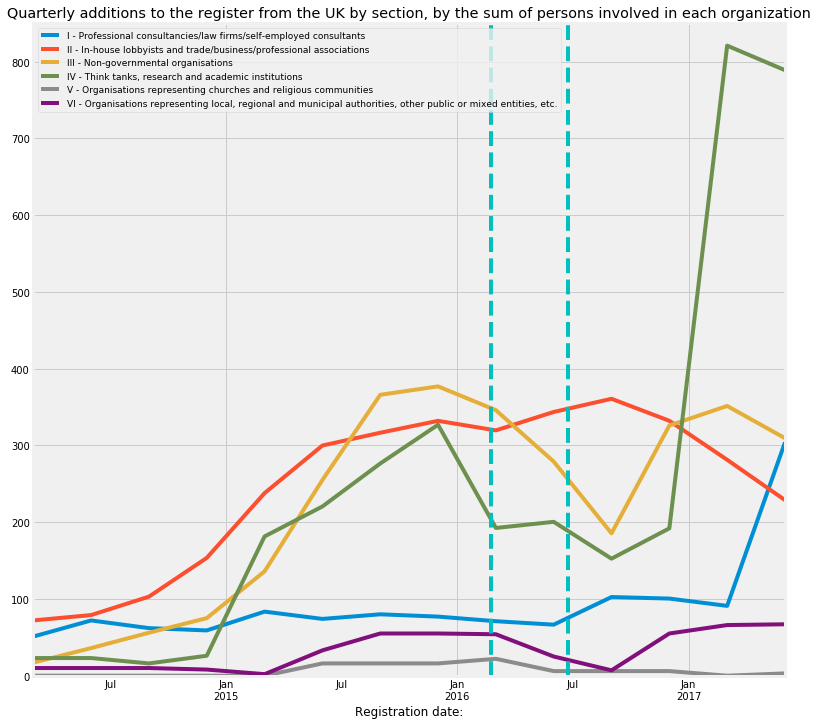

In [520]:
ax = df_types_UK.resample("3m").sum().fillna(0).rolling(window=4).sum().plot(figsize=(12,12))
plt.xlim( ('2014-3-1', '2017-6-30') )
plot.legend(loc=2, prop={'size': 9})
plt.title('Quarterly additions to the register from the UK by section, by the sum of persons involved in each organization')
ax.set_ylim([0,850])
line2, = plt.plot([553.76, 553.76], [0, 1400], 'c--', label="Brexit", linestyle='--')


ax.plot([557.76, 557.76], [0, 850], 'c--')

# plt.savefig('Section_UK.pdf')






In [257]:
# df_types_UK.resample("3m").sum().fillna(0).rolling(window=3).sum().plot(figsize=(12,12))
# plt.xlim( ('2013-12-31', '2017-6-30') )
# plot.legend(loc=2, prop={'size': 10})



In [205]:
# fig,ax = plt.subplots()

# df_types_UK.resample('A').plot(figsize=(12,12), ax=ax)
# plot.legend(loc=2, prop={'size': 12})



In [115]:
df

,Identification number:,Registration date:,Section,Subsection,(Organisation) name,Legal status:,Website address:,Head office country,Head office address,Head office city,Head office post code,Head office post box,Head office phone,Belgium office address,Belgium office city,Belgium office post code,Belgium office post box,Belgium office phone,Person with legal responsibility,Position:,Person in charge of EU relations,Position:.1,Goals / remit,Level of interest,EU initiatives,Relevant communication,High-level groups,Consultative committees,Expert groups,Inter groups,Industry forums,Number of persons involved:,Full time equivalent (FTE),Number of EP accredited persons,Persons accredited for access to European Parliament premises,Fields of interest,Membership,Member organisations,Financial year: Start Date,Financial year: End Date,Estimate of costs (absolute amount),Estimate of costs (as a range),Turnover (absolute amount),Turnover (as a range),Customers,Procurement:,Source,Grants:,Source.1
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-05-03,773837227033-59,03/05/2017,"VI - Organisations representing local, regiona...",Regional structures,Serviço Intermunicipalizado de Gestão de Resíd...,Association,http://www.lipor.pt,Portugal,"Rua da Morena, 805",Gondomar,4435-996 Baguim do M,Apartado 1510,(+351)229770100,NaN,NaN,NaN,NaN,NaN,Fernando Leite,CEO,Susana Abreu,International Business Unit,LIPOR – Intermunicipal Waste Management of Gre...,"European, national, regional/local",The Company’s core business is based on the Eu...,E-Implementation Toolkit (Horizon 2020) \nRARE...,NaN,NaN,NaN,NaN,NaN,85,21.25,NaN,NaN,"Agriculture and Rural Development, Education, ...","Taking on a policy of transparency, cooperatio...",The relationship between LIPOR and its EMPLOYE...,01/01/2016,01/12/2016,NaN,1750000-1999999,53148.0,NaN,NaN,NaN,NaN,45748.0,H2020/Waste ub-2016/Comissão Europeia(641660);...
2017-05-17,619080527193-67,17/05/2017,II - In-house lobbyists and trade/business/pro...,Companies & groups,JURISTAX,SPRL,http://www.juristax.eu,Belgium,Chaussée de Viesville 148,Gosselies,NaN,NaN,(+32)476394113,NaN,NaN,NaN,NaN,NaN,JEAN PIERRE RIQUET,GERANT,JEAN PIERRE RIQUET,GERANT,Conseiller et défendre dans les matières jurid...,European,Politique de gestion de la TVA européenne,Participation aux groupe de travail,NaN,NaN,NaN,NaN,NaN,1,0.25,NaN,NaN,"Economic and Financial Affairs, Trade, Competi...",Académie fiscale,IEC-IAB,01/01/2016,01/12/2016,NaN,0-9999,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-26,260636426921-26,26/04/2017,III - Non-governmental organisations,"Non-governmental organisations, platforms and ...",Center for Energy Efficiency and Renewables (P...,Association,http://proenergy.md,"Moldova, Republic Of","Str. Ismail 18, ap. 1 str. Lomonosov 51/1, ap. 26",Chisinau,MD2001,NaN,(+373)69136889,NaN,NaN,NaN,NaN,NaN,Ruslan Surugiu,President,Ruslan Surugiu,President,Center for Energy Efficiency and Renewables “P...,"national, regional/local",SUDeP East European Initiative \n \nComprehens...,Awareness raising program in the field of ener...,NaN,NaN,NaN,NaN,NaN,3,2.25,NaN,NaN,Energy,NaN,NaN,01/03/2016,01/03/2017,NaN,10000-24999,12000.0,NaN,NaN,NaN,NaN,10000.0,"SUDeP, European Commission/European Delegation..."
2017-04-21,625772526856-05,21/04/2017,II - In-house lobbyists and trade/business/pro...,Trade unions and professional associations,"Federación Provincial de Agricultores, ganader...",Organización Profesional Agraria,http://www.asajacastelln.com,Spain,"C/ Juan Antonio balbés nº entlo, 1",Castellón,12004,NaN,(+34)964213266,NaN,NaN,NaN,NaN,NaN,Néstor Zenon Pascual LLorens,Presidente,Domènec Josep Nàcher Cervera,Secretario Gral. Técnico,2. La defensa en general de ...,"European, national, regional/local",Reglamento Coinmunitario PAC 2020-2027 \nDirec...,NaN,NaN,NaN,NaN,NaN,NaN,2,0.75,NaN,NaN,"General and Institutional Affairs, Economic an...",Asociación Provincial de Mujeres del Ámbito Ru...,NaN,01/01/2016,01/12/2016,NaN,100000-199999,0.0,NaN,

In [54]:
df_types_rest = df[df['Head office country'].str.contains('Germany|Netherlands|Ireland|France|Belgium' )]

In [55]:
df_types_rest = df_types_rest.pivot_table(index=('Registration date:'), columns='Section', values='Number of persons involved:')

In [56]:
df_types_rest.head()

Section,I - Professional consultancies/law firms/self-employed consultants,II - In-house lobbyists and trade/business/professional associations,III - Non-governmental organisations,"IV - Think tanks, research and academic institutions",V - Organisations representing churches and religious communities,"VI - Organisations representing local, regional and municipal authorities, other public or mixed entities, etc."
Registration date:,,,,,,
01/01/2016,NaN,NaN,1.0,NaN,NaN,NaN
01/02/2014,NaN,NaN,1.0,NaN,NaN,NaN
01/02/2016,NaN,NaN,NaN,NaN,2.0,NaN
01/02/2017,20.333333,1.0,2.5,1.0,NaN,NaN
01/03/2016,5.000000,NaN,1.0,NaN,NaN,NaN


In [57]:
df_types_rest.index = pd.to_datetime(df_types_rest.index, format="%d/%m/%Y")

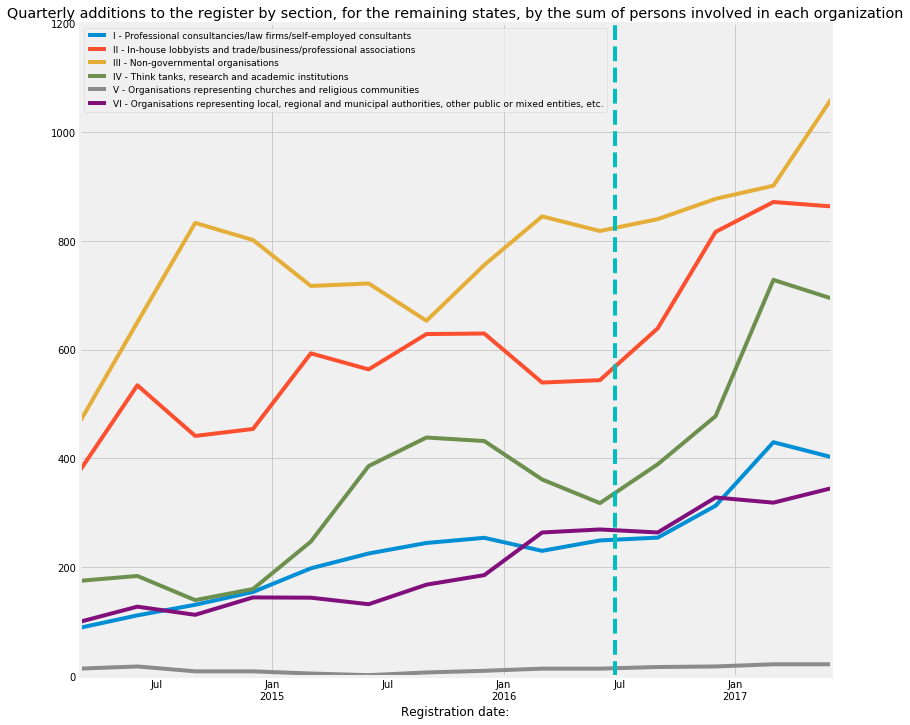

In [514]:
ax = df_types_rest.resample("3m").sum().fillna(0).rolling(window=4).sum().plot(figsize=(12,12))
plt.xlim( ('2014-3-1', '2017-6-30') )
plot.legend(loc=2, prop={'size': 9})
plt.title('Quarterly additions to the register by section, for the remaining states, by the sum of persons involved in each organization')

ax.set_ylim([0,1200])

ax.plot([557.76, 557.76], [0, 1200], 'c--')

plt.savefig('Section_remaining_States.pdf')




In [259]:
# df_types_rest.resample("3m").sum().fillna(0).rolling(window=5).sum().plot(figsize=(12,12))
# plt.xlim( ('2013-12-31', '2017-6-30') )
# plot.legend(loc=2, prop={'size': 10})






In [260]:
# df_types_rest.resample("3m").sum().fillna(0).rolling(window=3).sum().plot(figsize=(12,12))
# plt.xlim( ('2013-12-31', '2017-6-30') )
# plot.legend(loc=2, prop={'size': 10})





In [261]:
# df_types_rest.resample("6m").sum().fillna(0).rolling(window=2).sum().plot(figsize=(12,12))
# plt.xlim( ('2013-12-31', '2017-6-30') )
# plot.legend(loc=2, prop={'size': 10})




In [262]:
# import matplotlib.pyplot as plt
# fig,ax = plt.subplots()

# df_types_rest.resample('A').plot(figsize=(12,12), ax=ax)
# plot.legend(loc=2, prop={'size': 12})






In [59]:
df.head(1)

,Identification number:,Registration date:,Section,Subsection,(Organisation) name,Legal status:,Website address:,Head office country,Head office address,Head office city,...,Financial year: End Date,Estimate of costs (absolute amount),Estimate of costs (as a range),Turnover (absolute amount),Turnover (as a range),Customers,Procurement:,Source,Grants:,Source.1
date,,,,,,,,,,,,,,,,,,,,,
2017-05-03,773837227033-59,03/05/2017,"VI - Organisations representing local, regiona...",Regional structures,Serviço Intermunicipalizado de Gestão de Resíd...,Association,http://www.lipor.pt,Portugal,"Rua da Morena, 805",Gondomar,...,01/12/2016,NaN,1750000-1999999,53148.0,NaN,NaN,NaN,NaN,45748.0,H2020/Waste ub-2016/Comissão Europeia(641660);...


In [60]:
df.head()

,Identification number:,Registration date:,Section,Subsection,(Organisation) name,Legal status:,Website address:,Head office country,Head office address,Head office city,...,Financial year: End Date,Estimate of costs (absolute amount),Estimate of costs (as a range),Turnover (absolute amount),Turnover (as a range),Customers,Procurement:,Source,Grants:,Source.1
date,,,,,,,,,,,,,,,,,,,,,
2017-05-03,773837227033-59,03/05/2017,"VI - Organisations representing local, regiona...",Regional structures,Serviço Intermunicipalizado de Gestão de Resíd...,Association,http://www.lipor.pt,Portugal,"Rua da Morena, 805",Gondomar,...,01/12/2016,NaN,1750000-1999999,53148.0,NaN,NaN,NaN,NaN,45748.0,H2020/Waste ub-2016/Comissão Europeia(641660);...
2017-05-17,619080527193-67,17/05/2017,II - In-house lobbyists and trade/business/pro...,Companies & groups,JURISTAX,SPRL,http://www.juristax.eu,Belgium,Chaussée de Viesville 148,Gosselies,...,01/12/2016,NaN,0-9999,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-26,260636426921-26,26/04/2017,III - Non-governmental organisations,"Non-governmental organisations, platforms and ...",Center for Energy Efficiency and Renewables (P...,Association,http://proenergy.md,"Moldova, Republic Of","Str. Ismail 18, ap. 1 str. Lomonosov 51/1, ap. 26",Chisinau,...,01/03/2017,NaN,10000-24999,12000.0,NaN,NaN,NaN,NaN,10000.0,"SUDeP, European Commission/European Delegation..."
2017-04-21,625772526856-05,21/04/2017,II - In-house lobbyists and trade/business/pro...,Trade unions and professional associations,"Federación Provincial de Agricultores, ganader...",Organización Profesional Agraria,http://www.asajacastelln.com,Spain,"C/ Juan Antonio balbés nº entlo, 1",Castellón,...,01/12/2016,NaN,100000-199999,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-10,377496227124-29,10/05/2017,I - Professional consultancies/law firms/self-...,Professional consultancies,NW (NW),Private,https://www.linkedin.com/in/nicolaswallet/,United Kingdom,10 Lyron,Rendall,...,01/04/2017,NaN,0-9999,9900.0,NaN,European Marine Energy Centre Ltd,NaN,NaN,NaN,NaN


In [61]:
pd.set_option('display.max_columns', None)


In [62]:
df['Fields of interest'].value_counts()

General and Institutional Affairs, Economic and Financial Affairs, Agriculture and Rural Development, Humanitarian Aid, Audiovisual and Media, Budget, Trade, Competition, Consumer Affairs, Culture, Development, Customs, Education, Enlargement, Employment and Social Affairs, Energy, Enterprise, Environment, Taxation, Youth, Justice and Fundamental Rights, Internal Market, Fisheries and Aquaculture, Foreign and Security Policy and Defence, Regional Policy, Research and Technology, External Relations, Trans-European Networks, Public Health, Food Safety, Information Society, Sport, Transport, Climate Action, Home Affairs, Communication, Financial Stability, Financial Services and Capital Markets Union    227
Public Health                                                                                                                                                                                                                                                                                 

In [290]:
df_interest_uk = df[df['Head office country'].str.contains('United Kingdom' )]

In [291]:
df_interest_uk = df_interest_uk[['Registration date:', 'Fields of interest']]

In [65]:
# from sklearn.preprocessing import MultiLabelBinarizer

# mlb = MultiLabelBinarizer()


# # df_interest_uk = df_interest_uk.join(pd.DataFrame(mlb.fit_transform(df_interest_uk.pop('Fields of interest')),
# #                           columns=mlb.classes_,
# #                           index=df_interest_uk.index))



# # .columns = 


# # from sklearn.preprocessing import MultiLabelBinarizer

# # mlb = MultiLabelBinarizer()
# # df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('Col3')),
# #                           columns=mlb.classes_,
# #                           index=df.index))


In [264]:
# df_interest_uk.head()

In [292]:
df_interest_uk = df_interest_uk.set_index('Registration date:')['Fields of interest'].str.get_dummies(sep=', ')

In [293]:
df_interest_uk = df_interest_uk[['Economic and Financial Affairs', 'Financial Services and Capital Markets Union', 'Budget', 'Competition']]

In [294]:
df_interest_uk.head(5)

,Economic and Financial Affairs,Financial Services and Capital Markets Union,Budget,Competition
Registration date:,,,,
10/05/2017,0,0,0,0
05/05/2017,0,0,0,0
20/03/2017,1,1,0,0
07/06/2017,0,0,0,0
11/05/2017,1,0,0,1


In [295]:
df_interest_uk.index = pd.to_datetime(df_interest_uk.index, format="%d/%m/%Y")

In [296]:
# df_types_rest.resample('A').plot(figsize=(12,12), ax=ax)
# plot.legend(loc=2, prop={'size': 12})



In [297]:
# df_interest_uk = df_interest_uk.drop('Financial Stability', 1)
# df = df.drop('column_name', 1)


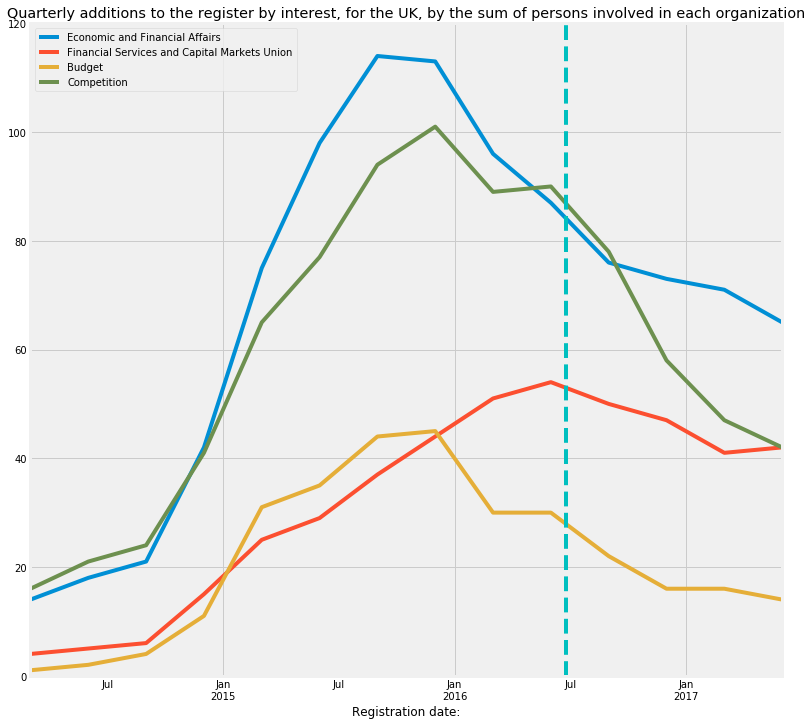

In [515]:
ax = df_interest_uk.resample("3m").sum().fillna(0).rolling(window=4).sum().plot(figsize=(12,12))

plt.xlim( ('2014-3-1', '2017-6-30') )
ax.set_ylim([0,120])

ax.plot([557.76, 557.76], [0, 120], 'c--')


# plot.legend(loc=2, prop={'size': 10})

plt.title('Quarterly additions to the register by interest, for the UK, by the sum of persons involved in each organization')


plt.savefig('Interest_UK.pdf')

### fig,ax = plt.subplots()

df_interest_uk.resample('6m').plot(figsize=(12,12), ax=ax)

In [75]:
# mlb = MultiLabelBinarizer()


In [76]:
# df_interest_uk = df_interest_uk.join(pd.DataFrame(mlb.fit_transform(df_interest_uk.pop('Fields of interest')),
#                           columns=mlb.classes_,
#                           index=df_interest_uk.index))


In [77]:
# df['Fields of interest'] = df['Fields of interest'].astype(str)
# df['Fields of interest'].apply(lambda x: x.split(','))
# mlb = MultiLabelBinarizer()


# df_interest_uk = df_interest_uk.join(pd.DataFrame(mlb.fit_transform(df_interest_uk.pop('Fields of interest')),
#                           columns=mlb.classes_,
#                           index=df_interest_uk.index))



In [382]:
df_interest_all = df[df['Head office country'].str.contains('UnitedGermany|Netherlands|Ireland|France|Belgium' )]

In [383]:
df_interest_all = df_interest_all[['Registration date:', 'Fields of interest']]

In [384]:
df_interest_all = df_interest_all.set_index('Registration date:')['Fields of interest'].str.get_dummies(sep=', ')

In [385]:
df_interest_all.index = pd.to_datetime(df_interest_all.index, format="%d/%m/%Y")

In [386]:
df_interest_all = df_interest_all[['Economic and Financial Affairs', 'Financial Services and Capital Markets Union', 'Budget', 'Competition']]

In [387]:
df_interest_all.head()

,Economic and Financial Affairs,Financial Services and Capital Markets Union,Budget,Competition
Registration date:,,,,
2017-05-17,1,0,0,1
2017-05-15,0,0,0,1
2017-05-03,0,0,0,0
2017-04-25,1,0,0,0
2017-05-22,0,0,0,0


In [388]:
# axvline(linewidth='2016-06-30', color='r')
# df_interest_all.resample("3m").sum().fillna(0).rolling(window=4).sum()
# plt.axvline(x, color='r')

In [402]:
df_interest_all.resample("3m").sum().fillna(0).rolling(window=4).sum()

,Economic and Financial Affairs,Financial Services and Capital Markets Union,Budget,Competition
Registration date:,,,,
2013-06-30,NaN,NaN,NaN,NaN
2013-09-30,NaN,NaN,NaN,NaN
2013-12-31,NaN,NaN,NaN,NaN
2014-03-31,67.0,12.0,37.0,75.0
2014-06-30,77.0,13.0,43.0,90.0
2014-09-30,86.0,14.0,41.0,91.0
2014-12-31,117.0,26.0,50.0,127.0
2015-03-31,170.0,39.0,67.0,185.0
2015-06-30,213.0,46.0,76.0,228.0


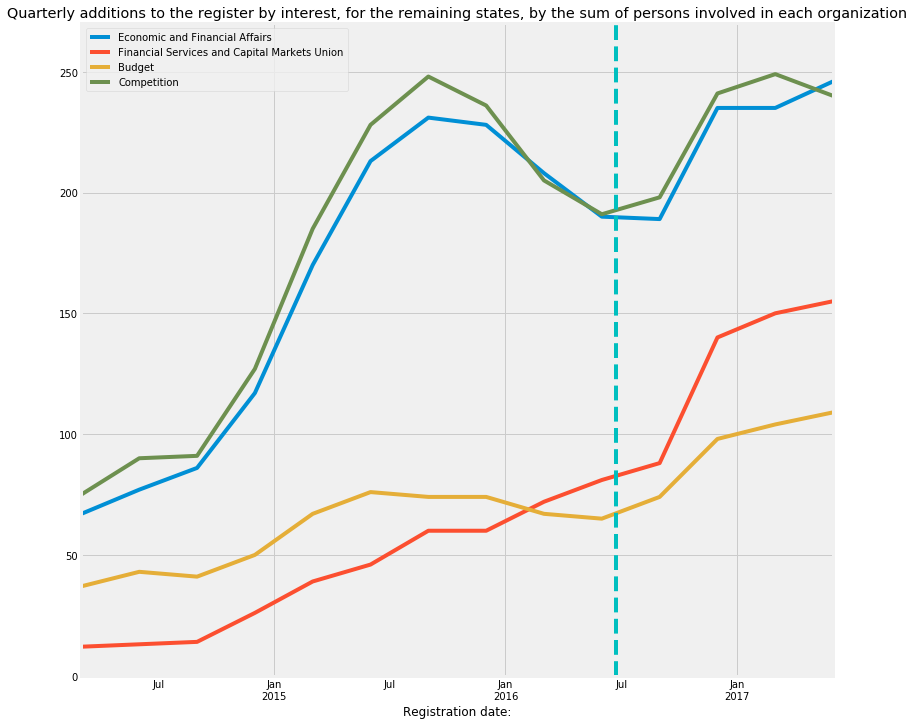

In [516]:
ax = df_interest_all.resample("3m").sum().fillna(0).rolling(window=4).sum().plot(figsize=(12,12))
ax.set_xlim(['2014-3-1', '2017-6-30'])
ax.set_ylim([0,270])
# plot.legend(loc=2, prop={'size': 10})
#y - 2017 * 12 -1 + month + d /30
ax.plot([557.76, 557.76], [0, 270], 'c--')
plt.title('Quarterly additions to the register by interest, for the remaining states, by the sum of persons involved in each organization')

plt.savefig('Interest_remaining_States.pdf')

AttributeError: 'DataFrame' has no attribute 'toarray'

In [329]:
# df_interest_all.resample("3m").sum().fillna(0).rolling(window=4).sum().plot(figsize=(12,12))
# plt.xlim( ('2014-3-1', '2017-6-30') )
# # plot.legend(loc=2, prop={'size': 10})
# plt.title('Quarterly additions to the register by interest, for the remaining states, summed by number of persons involved in the organization')

# Questions 

Let's clarify what the y axis is

why doesn't Financial and Capital markets Union show?

How do I put a point on Brexit?

In [343]:
df_interest_all = df_interest_all['Registration date:'].str.replace('-', '.')

KeyError: 'Registration date:'

In [333]:
df_interest_all.resample("3m").sum().fillna(0).rolling(window=4).sum()

,Economic and Financial Affairs,Financial Services and Capital Markets Union,Budget,Competition
Registration date:,,,,
2013-06-30,NaN,NaN,NaN,NaN
2013-09-30,NaN,NaN,NaN,NaN
2013-12-31,NaN,NaN,NaN,NaN
2014-03-31,67.0,12.0,37.0,75.0
2014-06-30,77.0,13.0,43.0,90.0
2014-09-30,86.0,14.0,41.0,91.0
2014-12-31,117.0,26.0,50.0,127.0
2015-03-31,170.0,39.0,67.0,185.0
2015-06-30,213.0,46.0,76.0,228.0


In [344]:
ax.plot(['Registration date:', '2016-06-30'], [0, max]) 
df_interest_all.resample("3m").sum().fillna(0).rolling(window=4).sum().plot(figsize=(12,12))
# plot.legend(loc=2, prop={'size': 10})
plt.title('Quarterly additions to the register by interest, for the remaining states, summed by number of persons involved in the organization')



DateParseError: Unknown datetime string format, unable to parse: REGISTRATION DATE: